In [1]:
import re
import csv
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Reading ratings file
# Ignore the timestamp column
ratings = pd.read_csv('ratings.csv', encoding='latin-1', usecols=['userId', 'movieId', 'rating']).dropna()
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [3]:
# Reading movies file
movies = pd.read_csv('movies.csv', encoding='latin-1', usecols=['movieId', 'title', 'genres']).dropna()
for i in movies.index:
    name = movies.loc[i, 'title']
    if ', The' in name:
        name = name.split(',')
        name = '{} {}'.format(name[1], name[0])
    temp = re.split(r' \((\d{4})\)', name)[0].strip()
    if 'The'==temp:
        name = re.split(r' \((\d{4})\)', name)
        name = '{}{}'.format(name[0], name[2])
        movies.loc[i, 'title'] = name.strip()
    else:
        movies.loc[i, 'title'] = temp

movies.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [4]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [5]:
# Join all 2 files into one dataframe
dataset = pd.merge(ratings, movies, how='inner', on = 'movieId')
# Display 20 movies with highest ratings
dataset.sort_values('rating', ascending=False).head()

,userId,movieId,rating,title,genres
3559944,9151,1103,5.0,Rebel Without a Cause,Drama
11899730,51507,3006,5.0,The Insider,Drama|Thriller
13914518,58532,1644,5.0,I Know What You Did Last Summer,Horror|Mystery|Thriller
5044618,23980,531,5.0,The Secret Garden,Children|Drama
16276472,36292,933,5.0,To Catch a Thief,Crime|Mystery|Romance|Thriller


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 5 columns):
userId     int64
movieId    int64
rating     float64
title      object
genres     object
dtypes: float64(1), int64(2), object(2)
memory usage: 915.5+ MB


In [7]:
ratings = pd.DataFrame(dataset.groupby('title')['rating'].mean())
ratings['num_of_ratings'] = pd.DataFrame(dataset.groupby('title')['rating'].count())

In [8]:
dataset = pd.merge(dataset, ratings, how='inner', on = 'title')

In [9]:
dataset.rename(columns={'rating_x':'rating',
                        'rating_y':'average_rating'}, 
                 inplace=True)
dataset.head()

,userId,movieId,rating,title,genres,average_rating,num_of_ratings
0,1,2,3.5,Jumanji,Adventure|Children|Fantasy,3.211977,22243
1,5,2,3.0,Jumanji,Adventure|Children|Fantasy,3.211977,22243
2,13,2,3.0,Jumanji,Adventure|Children|Fantasy,3.211977,22243
3,29,2,3.0,Jumanji,Adventure|Children|Fantasy,3.211977,22243
4,34,2,3.0,Jumanji,Adventure|Children|Fantasy,3.211977,22243


In [10]:
len(dataset.userId.unique())

138493

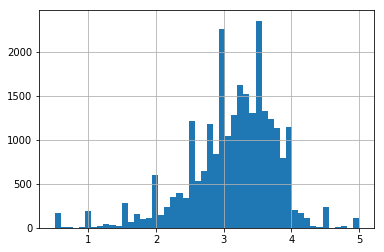

In [11]:
ratings['rating'].hist(bins=50)

We can see that most of the movies are rated between 2.5 and 4

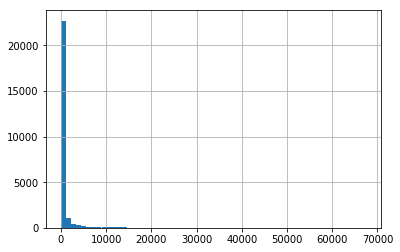

In [12]:
ratings['num_of_ratings'].hist(bins=60)

From the above histogram it is clear that most movies have few ratings. Movies with most ratings are those that are most famous

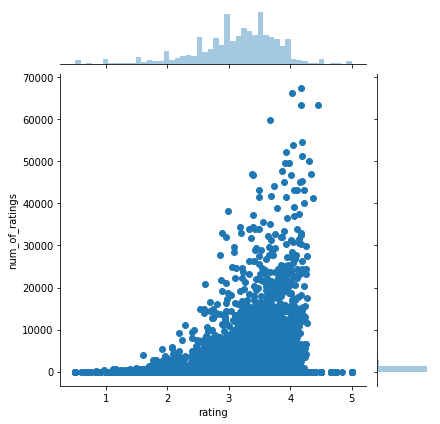

In [13]:
sns.jointplot(x='rating', y='num_of_ratings', data=ratings)

The graph indicates that the more the ratings a movie gets the higher the average rating it gets. This is important to note especially when choosing the threshold for the number of ratings per movie.

In [14]:
threshold = 2500
dataset = dataset[dataset['num_of_ratings']>threshold]

In [15]:
small_data = dataset[dataset['userId']<=100000]
small_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11359465 entries, 0 to 18777311
Data columns (total 7 columns):
userId            int64
movieId           int64
rating            float64
title             object
genres            object
average_rating    float64
num_of_ratings    int64
dtypes: float64(2), int64(3), object(2)
memory usage: 693.3+ MB


In [16]:
movie_matrix = small_data.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head(10)

title,(500) Days of Summer,10 Things I Hate About You,101 Dalmatians,101 Dalmatians (One Hundred and One Dalmatians),12 Angry Men,13 Going on 30,1984 (Nineteen Eighty-Four),2 Days in the Valley,"20,000 Leagues Under the Sea",2001: A Space Odyssey,...,Young Guns II,Young Sherlock Holmes,Zodiac,Zombieland,Zoolander,eXistenZ,the Bad and the Ugly Good,the Witch and the Wardrobe Chronicles of Narnia: The Lion,xXx,Â¡Three Amigos!
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
def get_recommendations(movie_title):
    movie_user_rating = movie_matrix[movie_title]
    similar_to_movie=movie_matrix.corrwith(movie_user_rating)
    corr_ab = pd.DataFrame(similar_to_movie, columns=['correlation'])
    corr_ab.dropna(inplace=True)
    corr_ab = corr_ab.join(ratings['rating'])
    corr_ab.rename(columns={'rating':'average_rating'}, inplace=True)
    return corr_ab.sort_values(by='correlation', ascending=False).head(10)

In [18]:
get_recommendations('The Matrix')

,correlation,average_rating
title,,
The Matrix,1.000000,4.187186
The Matrix Reloaded,0.519426,3.296389
The Matrix Revolutions,0.450520,3.143747
The Animatrix,0.360588,3.682432
Blade,0.332966,3.355627
Terminator 2: Judgment Day,0.330362,3.931954
Minority Report,0.327980,3.664897
The Lord of the Rings: The Two Towers,0.326290,4.107521
The Lord of the Rings: The Fellowship of the Ring,0.323902,4.137925
